In [1]:
from helpers import haversine;

from DataAcquisition import cand_latlon, resi_lat, resi_lon
import numpy as np
from sklearn.cluster  import KMeans
from random import sample
from math import inf, sqrt

In [2]:
residential = np.array([[resi_lat[i], resi_lon[i]] for i in range(len(resi_lat))])

def findNearest(curr_clusters, k):
    req = [0 for i in range(k)]
    for i in range(k):
        tmp = inf
        for j in range(len(cand_latlon)):
            dis = haversine(cand_latlon[j][0], cand_latlon[j][1], curr_clusters[i][0], curr_clusters[i][1])
            if (dis < tmp):
                tmp = dis
                req[i] = cand_latlon[j]
    return req

# Define k for the number of transformers we want, get random sample from cand_lat_lon
# In[144]:

def singleIteration(k):
    residential = np.array([[resi_lat[i], resi_lon[i]] for i in range(len(resi_lat))])
    compute = KMeans(n_clusters = k, random_state=0)
    curr = compute.fit(residential)
    tmp = findNearest(curr.cluster_centers_)    
    lat, lon = zip(*tmp)
    return lat, lon


def optimalLocationFinder(k, iters):
    compute = KMeans(n_clusters = k, random_state=0)
    curr_cand = compute.fit(residential).cluster_centers_
    residential_cand_site = np.concatenate((residential, np.array(curr_cand)))
    for i in range(iters):
        curr_centers = compute.fit(residential_cand_site).cluster_centers_;
        curr_cand = findNearest(curr_centers, k)
        residential_cand_site[-k:] = np.array(curr_cand)
    cand_lat, cand_lon = zip(*curr_cand)
    return cand_lat, cand_lon

checking behaviour

In [3]:
import matplotlib.pyplot as plt

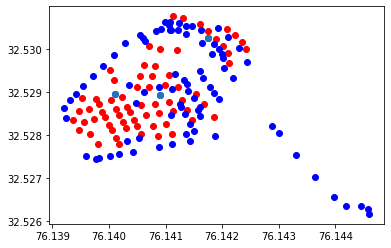

In [16]:
fit, ax = plt.subplots();
ax.scatter(resi_lon, resi_lat, color="red")
cand_lat, cand_lon = zip(*cand_latlon)
ax.scatter(cand_lon, cand_lat, color="blue")

curr_lat, curr_lon = optimalLocationFinder(3, 1);
ax.scatter(curr_lon, curr_lat)